# **Desafío de Clasificación: ¿Quién aceptará la oferta del banco?**

**Contexto del problema:**

Una institución financiera en Portugal llevó a cabo una campaña de marketing telefónico para ofrecer depósitos a plazo fijo. A partir de información socioeconómica y datos de contacto de los clientes, se busca optimizar futuras campañas identificando a los clientes con mayor probabilidad de aceptar la oferta.

**Objetivo del desafío:**

Utilizando el dataset provisto, tu equipo deberá desarrollar un modelo de clasificación binaria capaz de predecir si un cliente aceptará (o no) la oferta del depósito a plazo fijo (y: yes/no).

## **Tareas que deben realizar:**

**Exploración y análisis de datos (EDA)**

**Detectar outliers, valores faltantes, distribución de variables, correlaciones.**

**Identificar posibles sesgos y relaciones relevantes.**

**Preprocesamiento y transformación**

**Convertir variables categóricas a formato numérico (one-hot, label encoding, etc.).**

**Tratar con clases desequilibradas (upsampling, SMOTE, penalización de clase si fuera necesario).**

**Normalizar o escalar variables si es necesario.**

**Entrenamiento de modelos de clasificación**

**Implementar al menos dos modelos diferentes (por ejemplo: Árboles, Random Forest, XGBoost, Regresión Logística, etc.).**

**Ajustar hiperparámetros y realizar validación cruzada**.

**Evaluación del desempeño**

**Usar métricas como accuracy, precision, recall, F1-score, ROC AUC.**

**Mostrar la matriz de confusión y el análisis de errores.**

**Interpretabilidad y explicabilidad**

**Identificar las variables más importantes del modelo**.

**Justificar las decisiones tomadas en la preparación y selección de modelos.**

**Presentación de resultados**

**Visualizaciones clave del análisis y del rendimiento del modelo.**

**Conclusiones orientadas a recomendaciones accionables para el negocio.**



**Dataset:**

https://drive.google.com/file/d/1SZaboauCLrQfXWEVszTmIF92M98382Ao/view?usp=sharing

In [9]:
# Importación de librerías para la exploración inicial de datos
import pandas as pd  # Manipulación y análisis de datos
import numpy as np  # Operaciones numéricas y manejo de arreglos
import matplotlib as mpl  # Biblioteca para gráficos
import matplotlib.pyplot as plt  # Gráficos en 2D
import seaborn as sns  # Visualización de datos estadísticos
%matplotlib inline 
# Para mostrar gráficos en notebooks
# Importación de librerías para procesamiento de texto y análisis
from urllib.parse import quote  # Para codificar URLs
import nltk  # Biblioteca para procesamiento de lenguaje natural
nltk.download('punkt')  # Descarga de recursos para tokenización
nltk.download('punkt_tab')  # Descarga de recursos adicionales para tokenización
from nltk.corpus import stopwords  # Para manejar palabras vacías
from nltk.stem import WordNetLemmatizer  # Para lematización
from nltk.tokenize import word_tokenize  # Para tokenizar texto

# Importación de librerías para modelos de machine learning
from sklearn.feature_extraction.text import TfidfVectorizer  # Vectorización de texto
from sklearn.model_selection import train_test_split  # División de datos en conjuntos de entrenamiento y prueba
from sklearn.linear_model import LinearRegression  # Regresión lineal
from sklearn.metrics import mean_squared_error, r2_score  # Métricas de evaluación
from sklearn.cluster import KMeans  # Algoritmo de clustering K-means
from sklearn.tree import DecisionTreeClassifier, plot_tree  # Árboles de decisión

# Importación de librerías para regresión logística
import statsmodels.api as sm  # Modelos estadísticos
import statsmodels.formula.api as smf  # Fórmulas para modelos estadísticos

# Importación de librerías para traducción
from googletrans import Translator  # Traductor de Google
from deep_translator import GoogleTranslator  # Traductor profundo de Google
from translate import Translator  # Otra opción de traductor

# Importación de librerías adicionales
import os  # Interacción con el sistema operativo
from urllib.parse import quote  # Importar la función quote para codificar URLs



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\QY539GE\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\QY539GE\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [10]:
import pandas as pd

# Levanto el CSV
df = pd.read_csv('bank.csv')

# Muestra las primeras filas del dataframe
print(df.head())


   age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes  


In [15]:
# 1. Obtener la forma del DataFrame
print("Forma del DataFrame (filas, columnas):")
print(df.shape)

# 2. Obtener información general del DataFrame
print("\nInformación del DataFrame:")
print(df.info())

# 3. Obtener estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(df.describe(include='all'))  # include='all' para incluir columnas no numéricas

Forma del DataFrame (filas, columnas):
(11162, 17)

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB
None

Estadísticas d


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB
None

Descripción estadística:
                 age         job  marital 

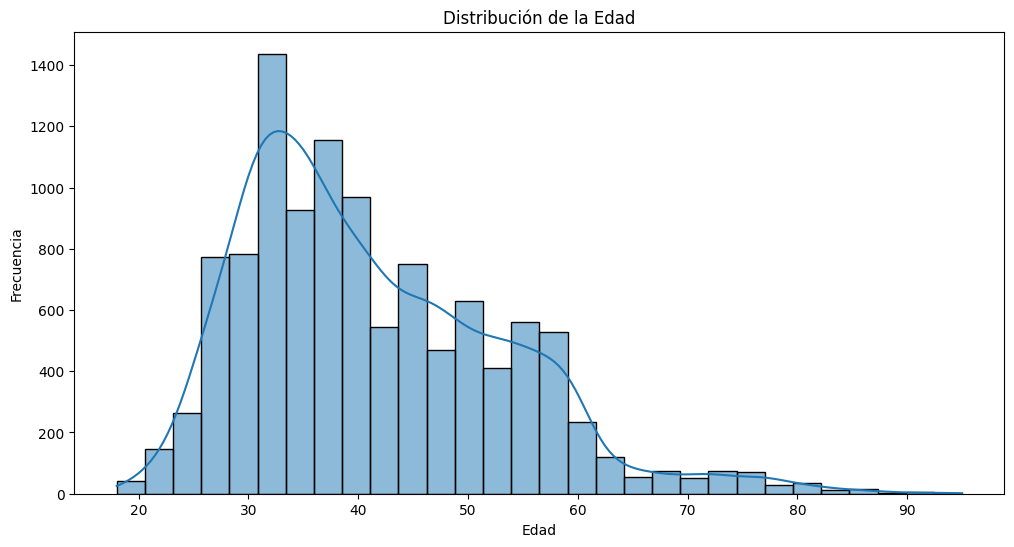

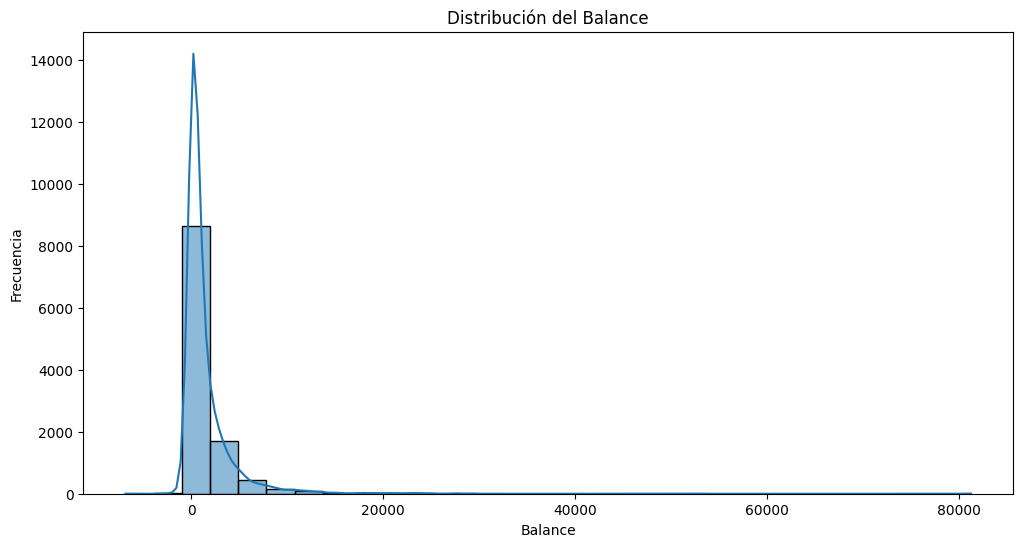

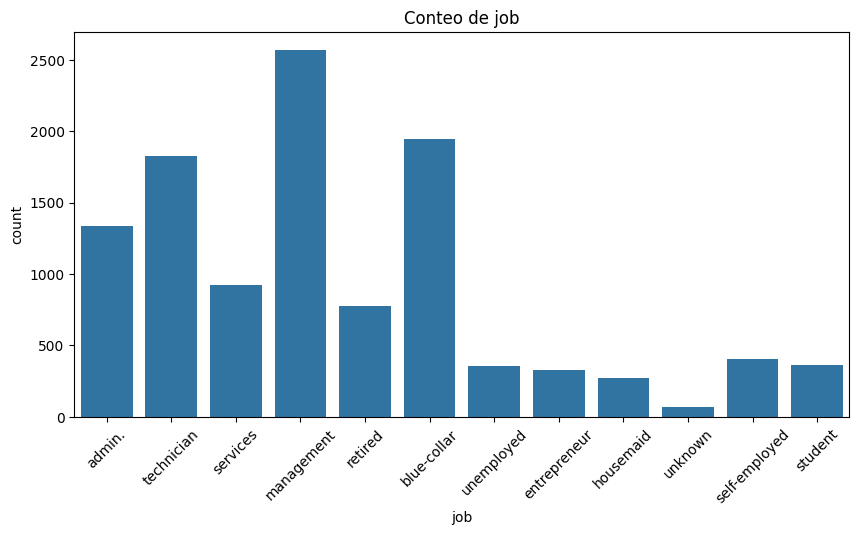

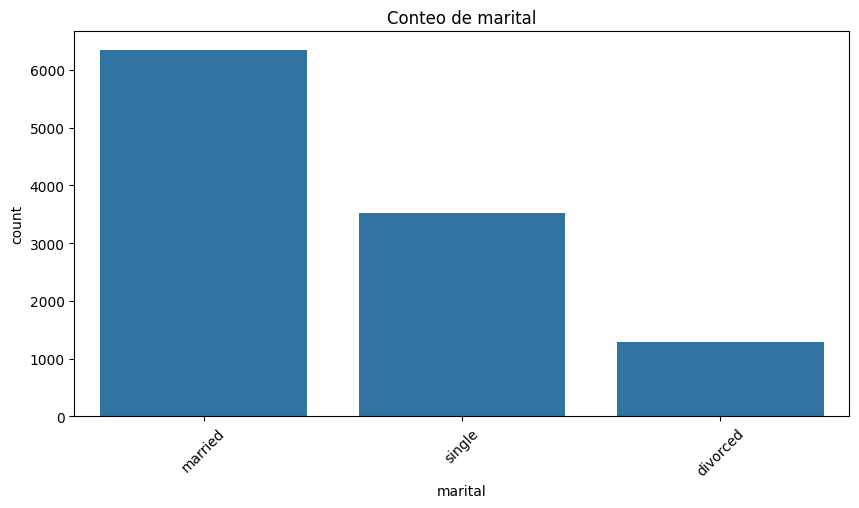

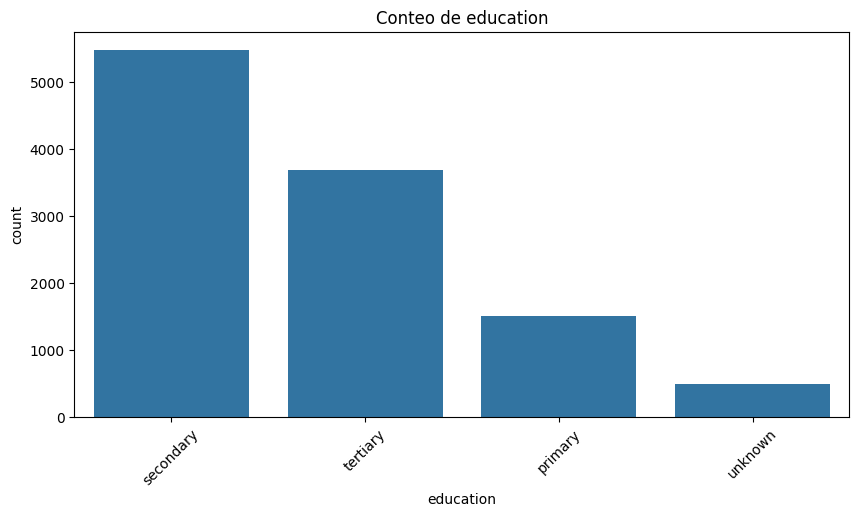

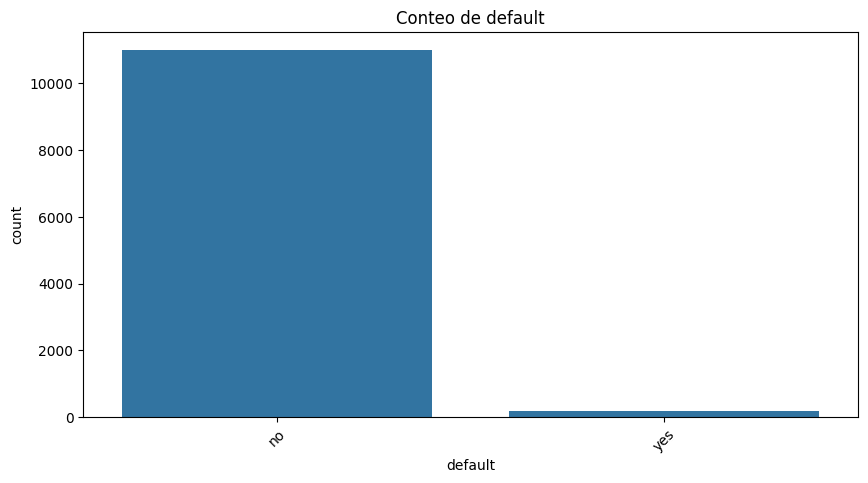

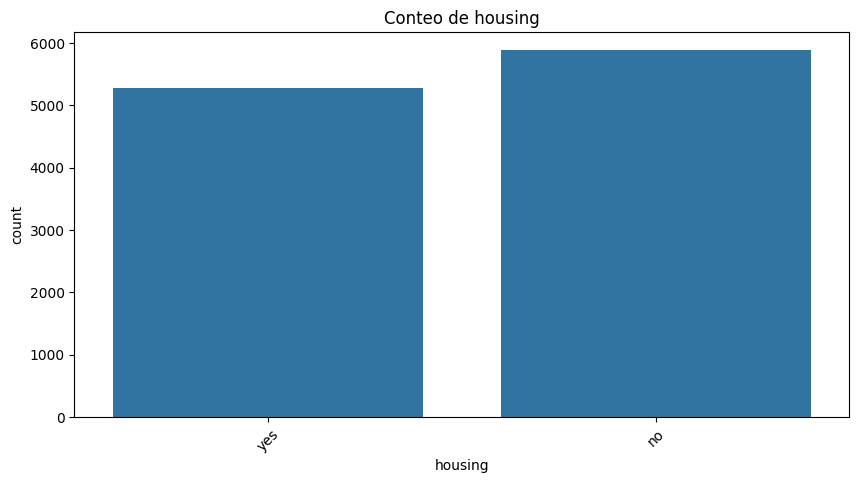

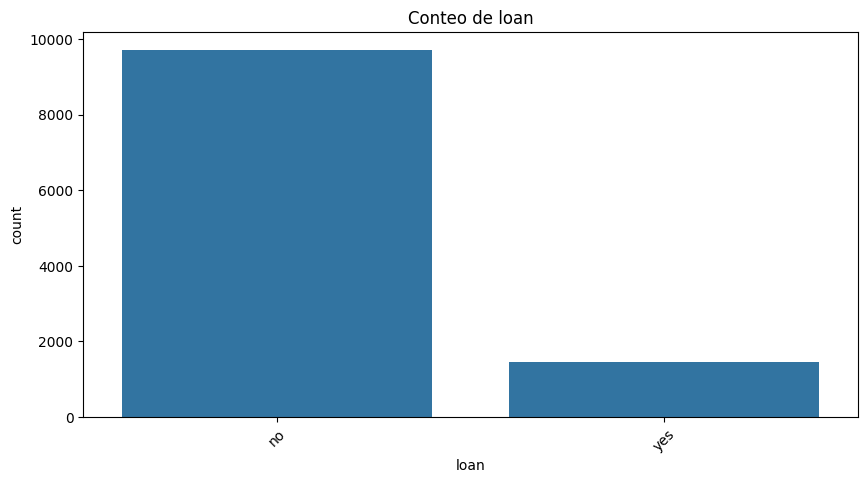

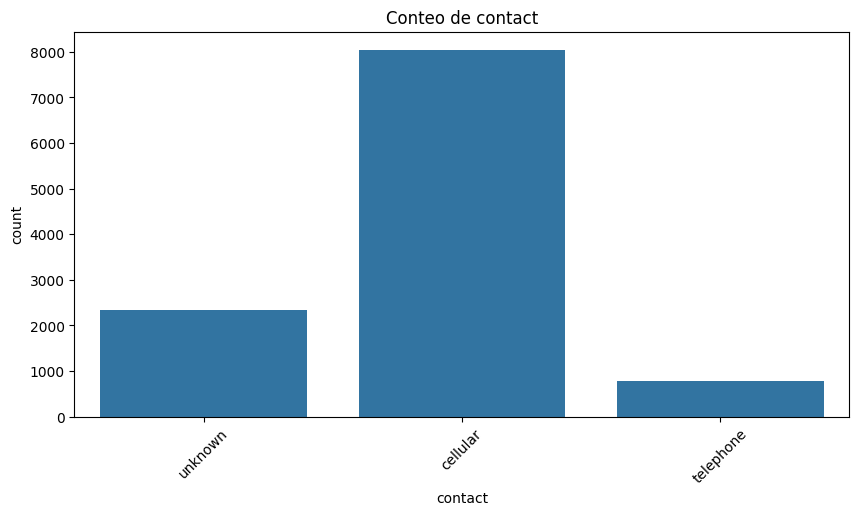

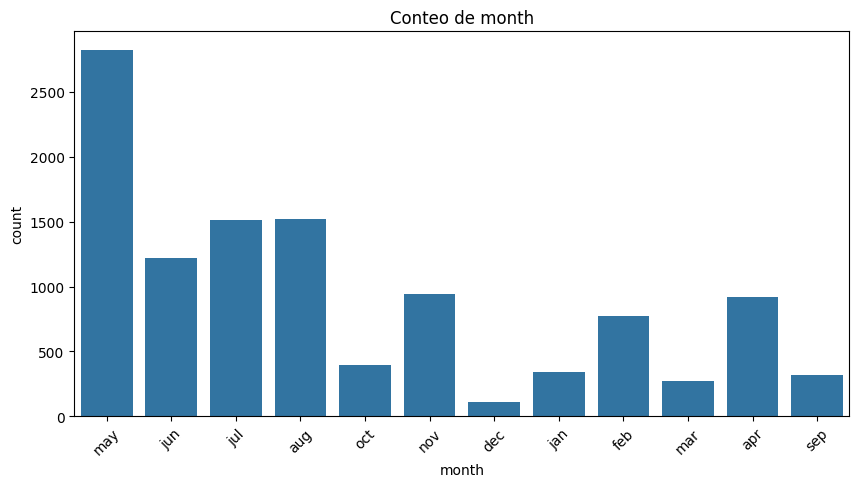

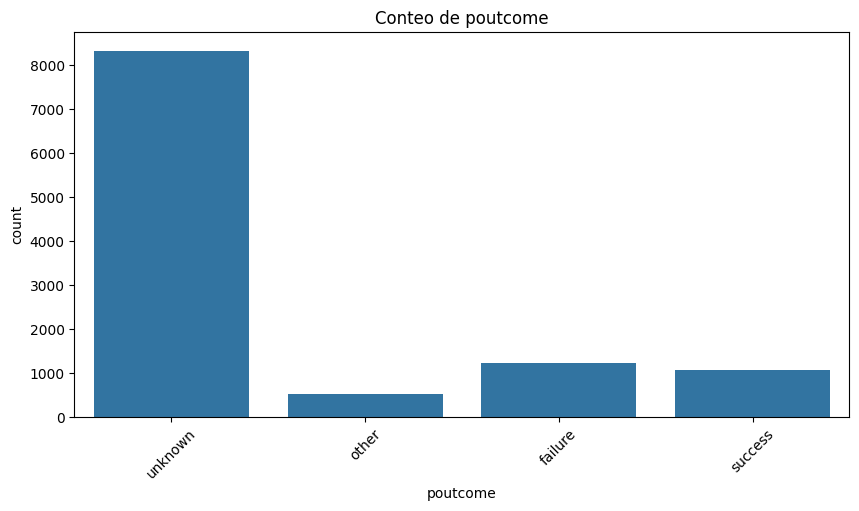

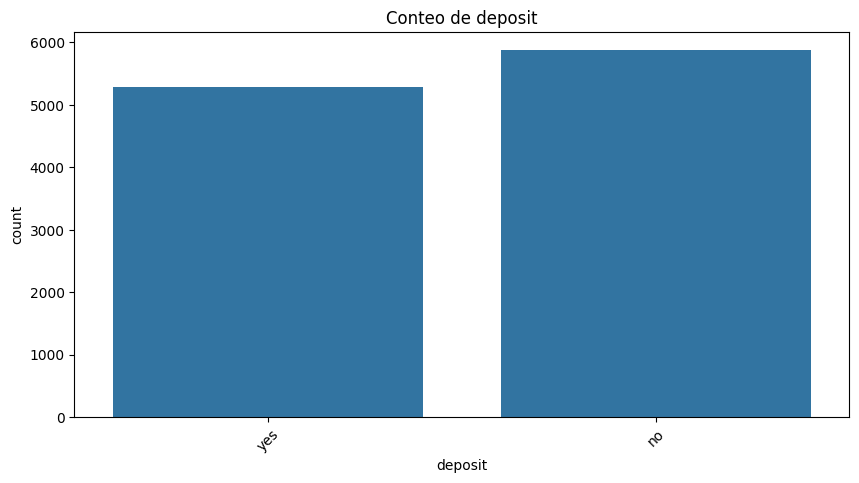

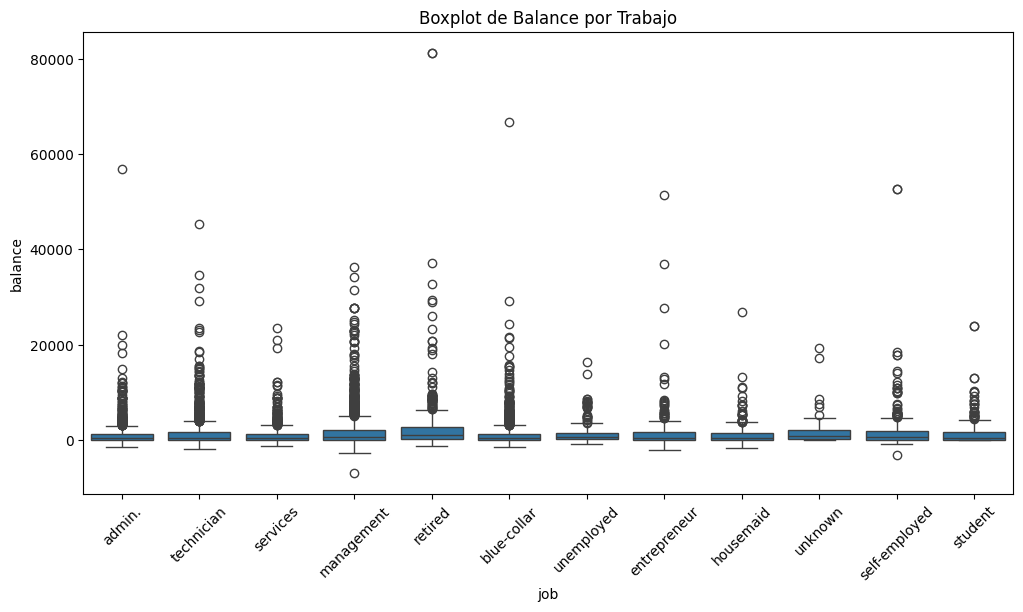

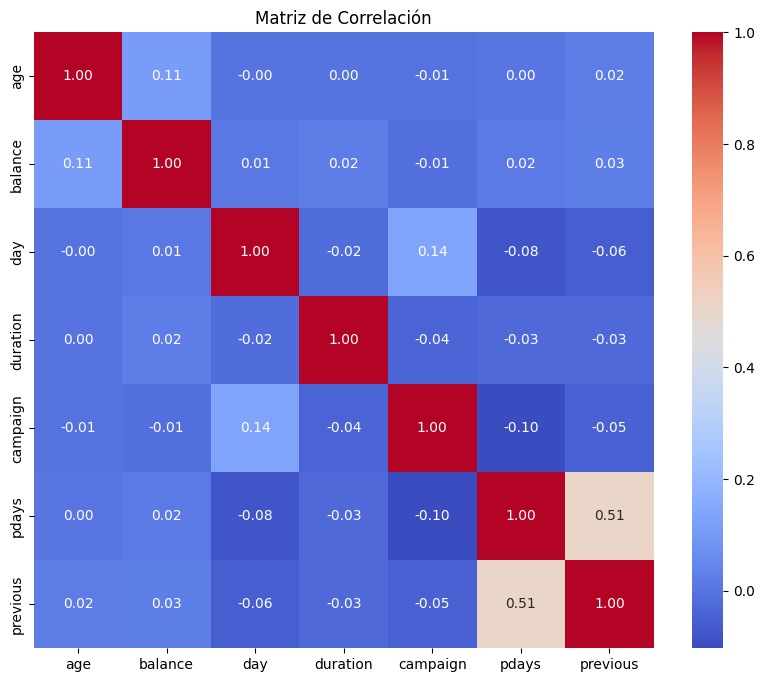

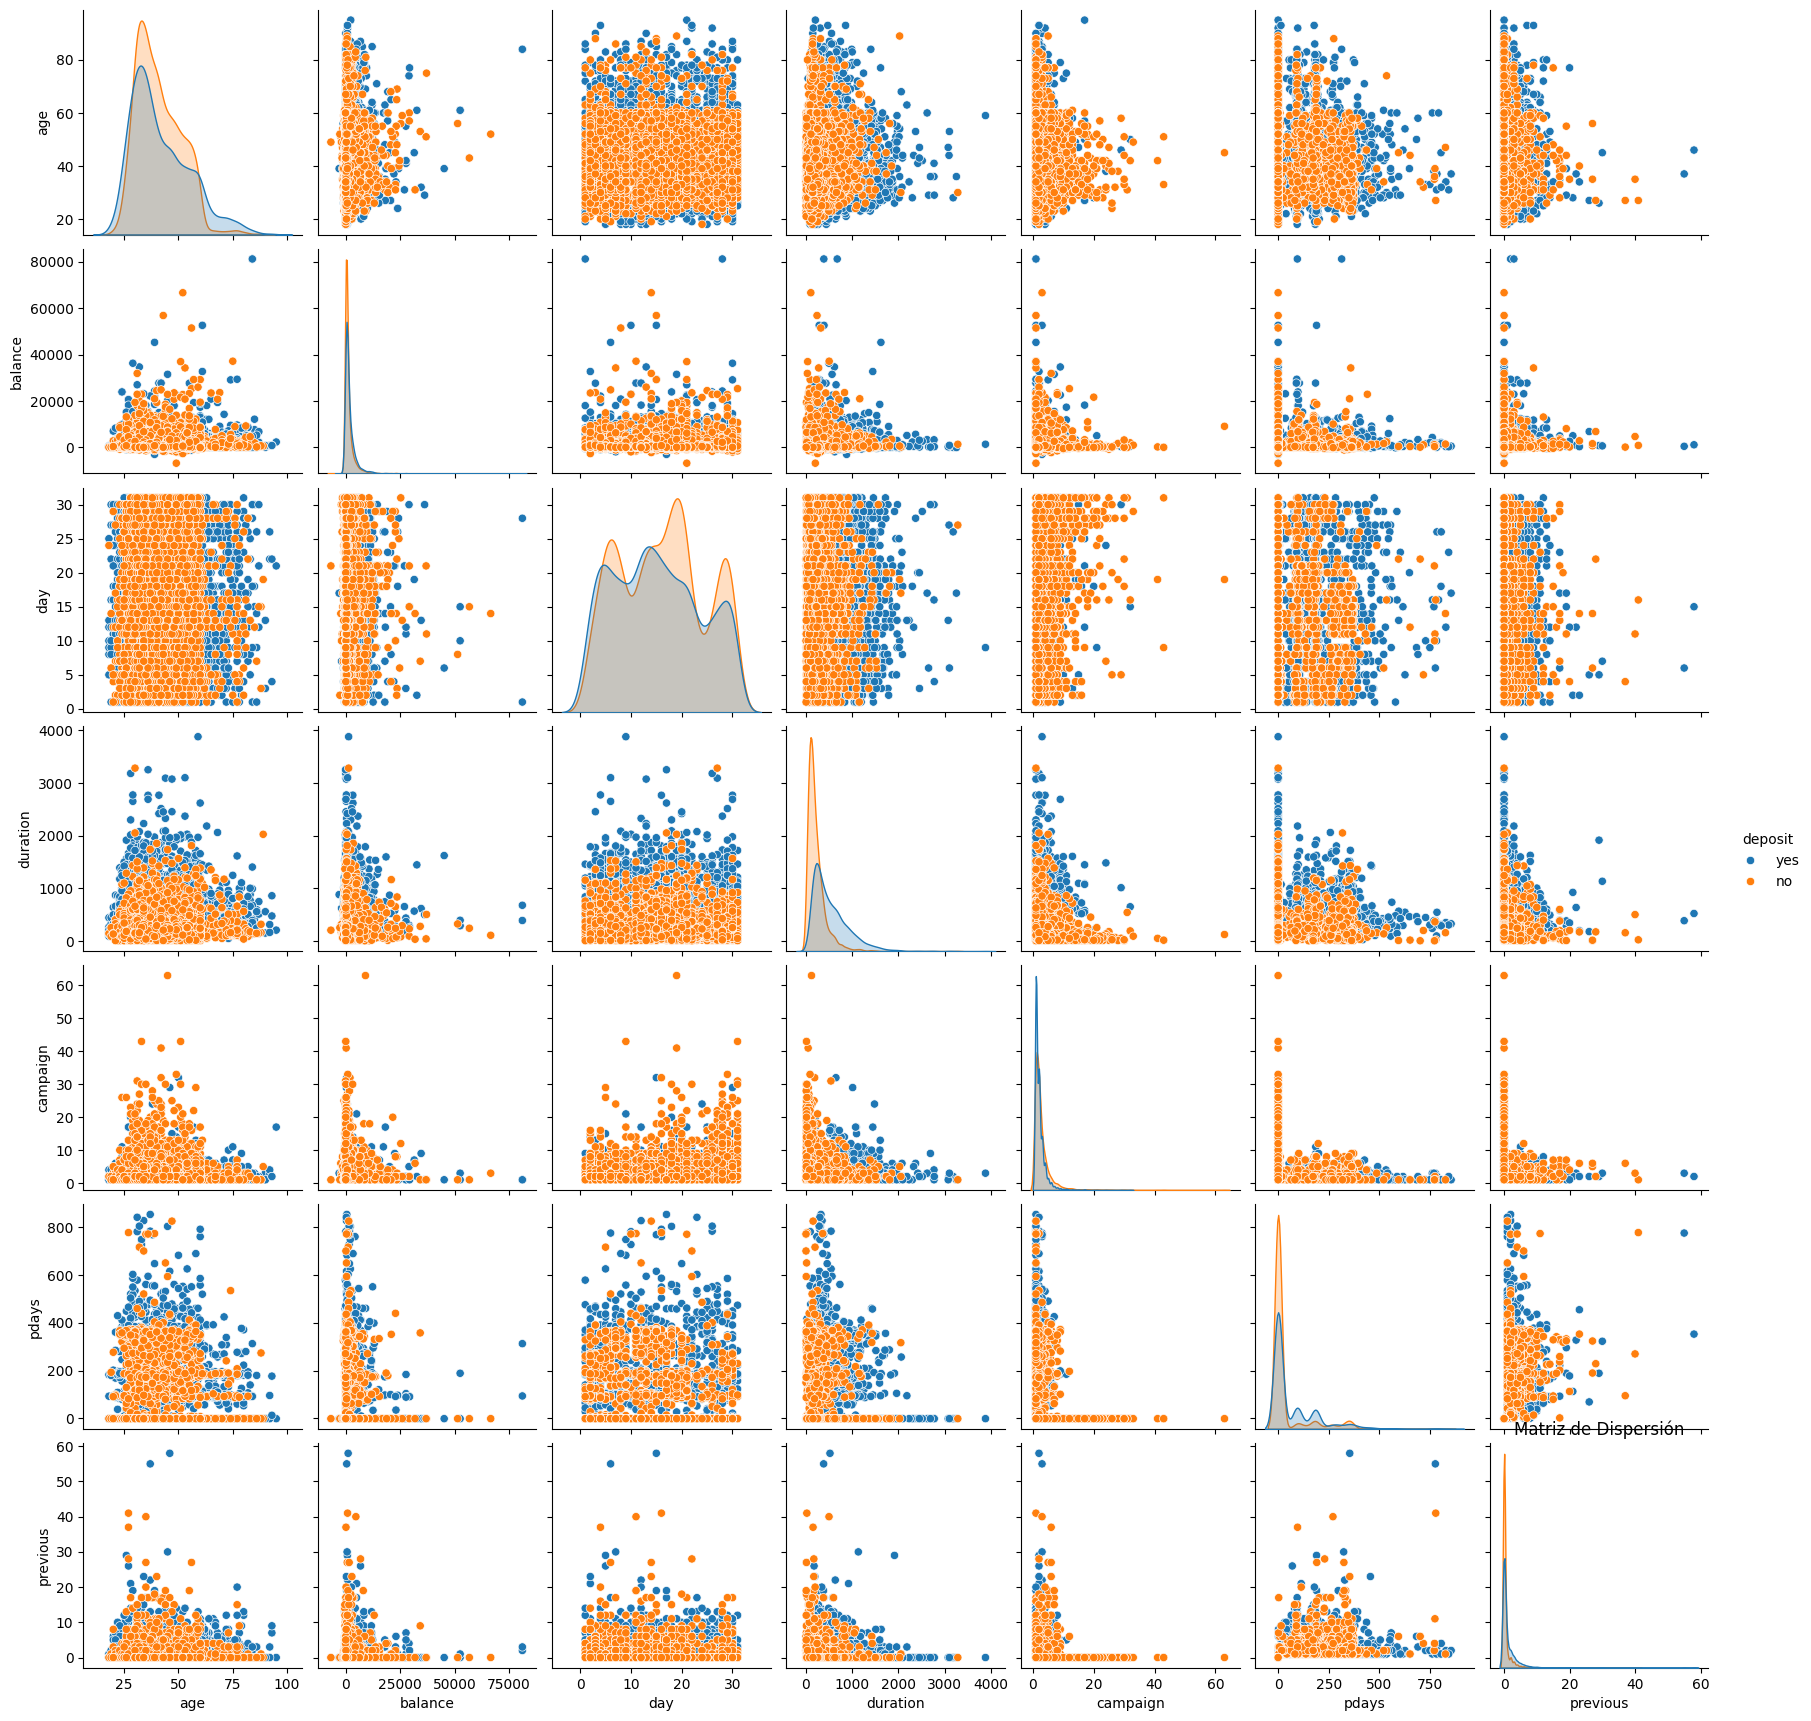

In [11]:
# 1. Información general del dataset
print("\nInformación del dataset:")
print(df.info())

# 2. Descripción estadística
print("\nDescripción estadística:")
print(df.describe(include='all'))

# 3. Verificar valores nulos
print("\nValores nulos por columna:")
print(df.isnull().sum())

# 4. Visualización de la distribución de la edad
plt.figure(figsize=(12, 6))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Distribución de la Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

# 5. Visualización de la distribución del balance
plt.figure(figsize=(12, 6))
sns.histplot(df['balance'], bins=30, kde=True)
plt.title('Distribución del Balance')
plt.xlabel('Balance')
plt.ylabel('Frecuencia')
plt.show()

# 6. Análisis de variables categóricas
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'deposit']

for col in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=col)
    plt.title(f'Conteo de {col}')
    plt.xticks(rotation=45)
    plt.show()

# 7. Boxplot para identificar outliers en el balance
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='job', y='balance')
plt.title('Boxplot de Balance por Trabajo')
plt.xticks(rotation=45)
plt.show()

# 8. Análisis de correlaciones solo con columnas numéricas
numeric_df = df.select_dtypes(include=[np.number])  # Selecciona solo columnas numéricas
plt.figure(figsize=(10, 8))
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

# 9. Análisis de relaciones entre variables
sns.pairplot(df, hue='deposit')  # Cambia 'deposit' por la variable objetivo
plt.title('Matriz de Dispersión')
plt.show()

Valores faltantes por columna:
Series([], dtype: int64)

Outliers en la columna 'balance':
9         5090
60        7180
61        5291
69        4580
71       10576
         ...  
11073     6718
11077     6102
11085     4243
11086     6445
11101     6242
Name: balance, Length: 1055, dtype: int64


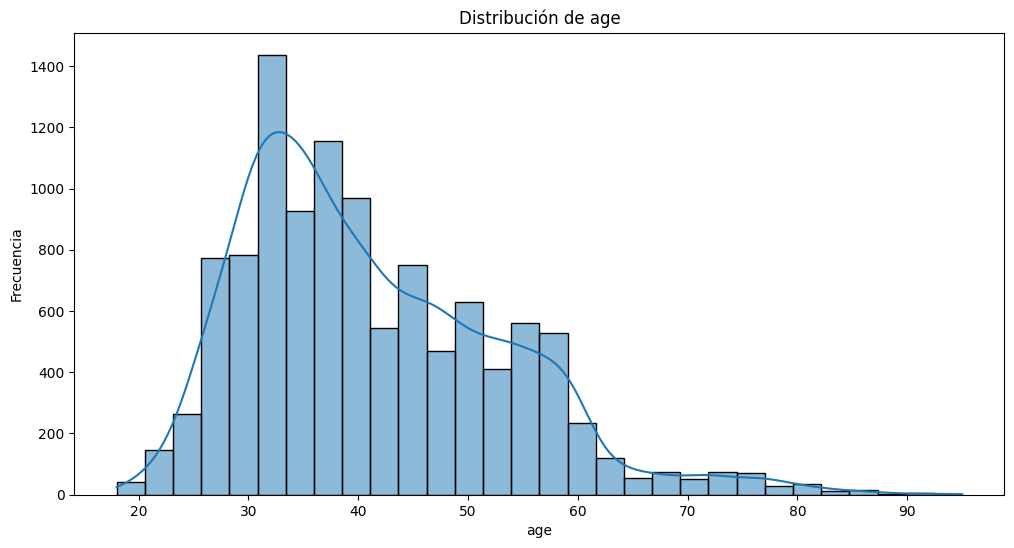

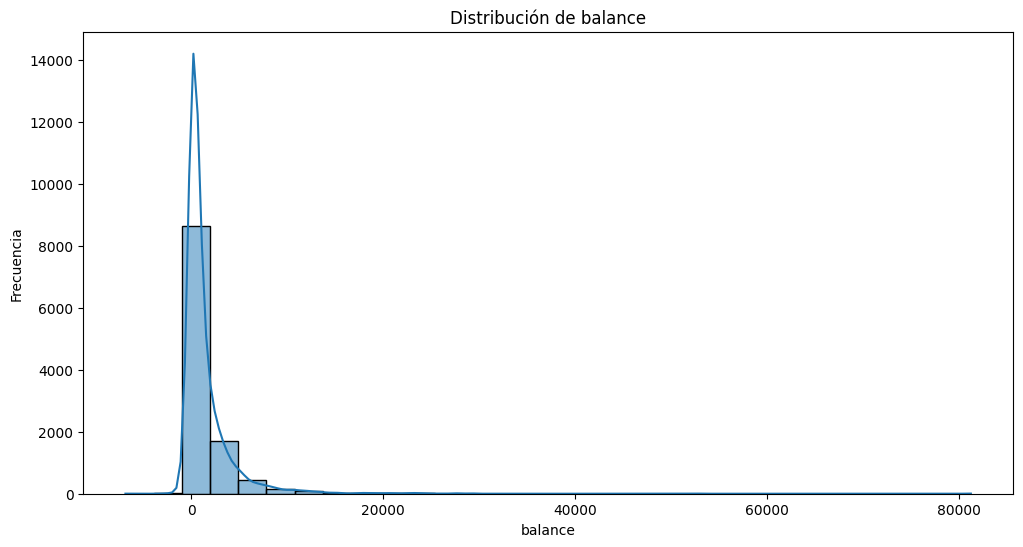

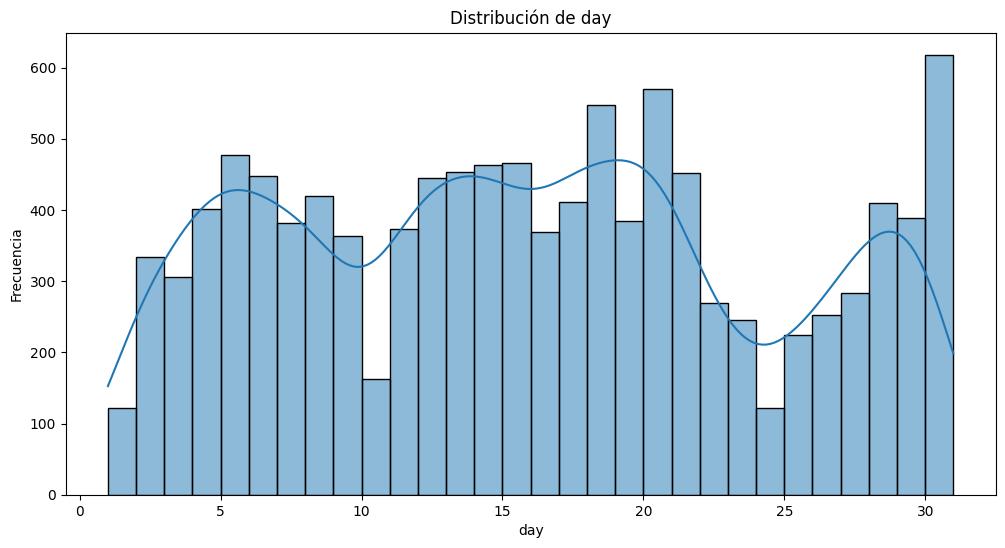

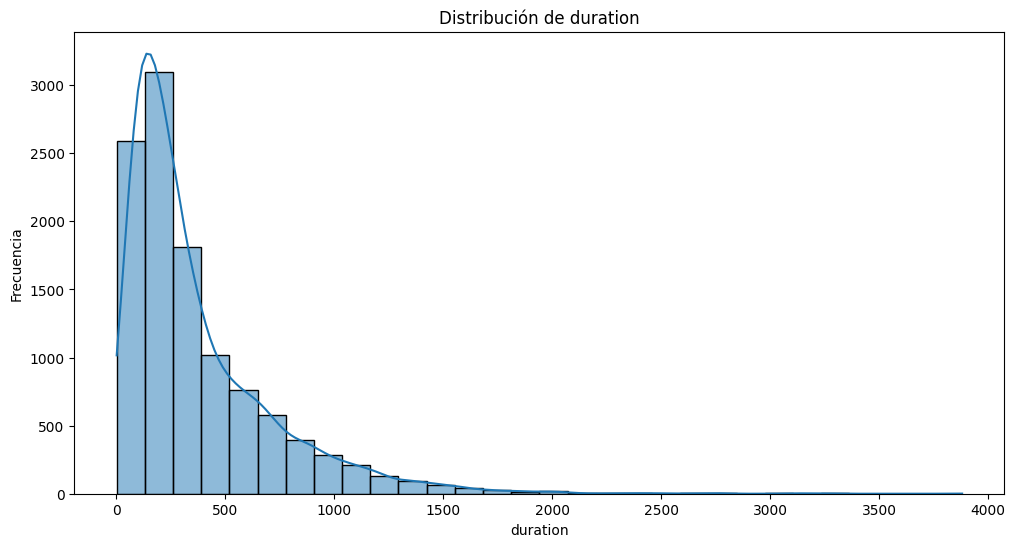

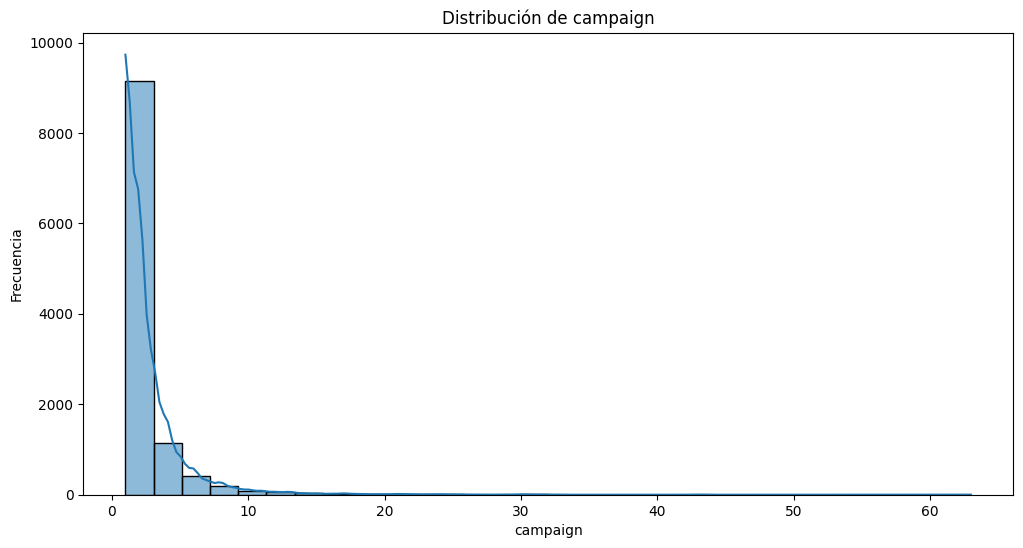

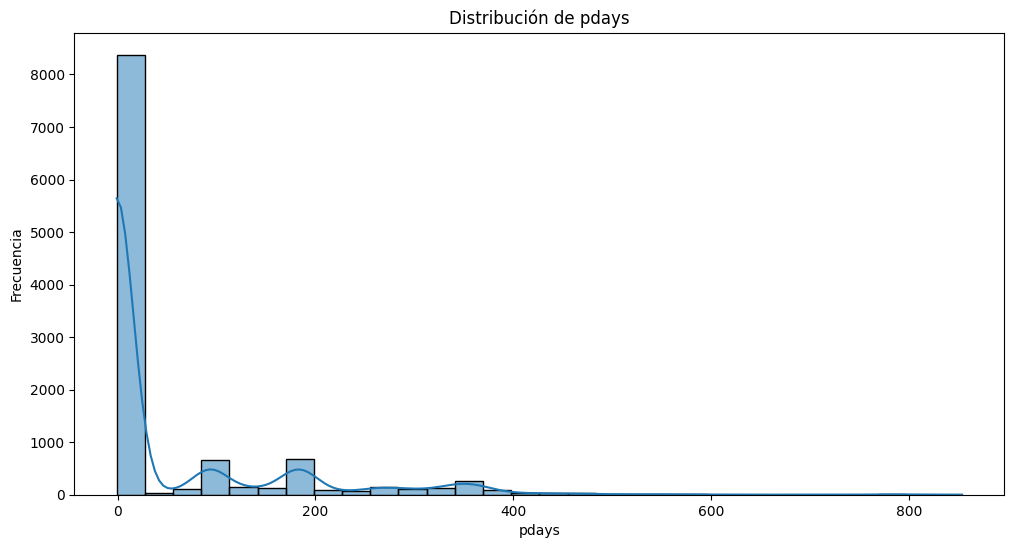

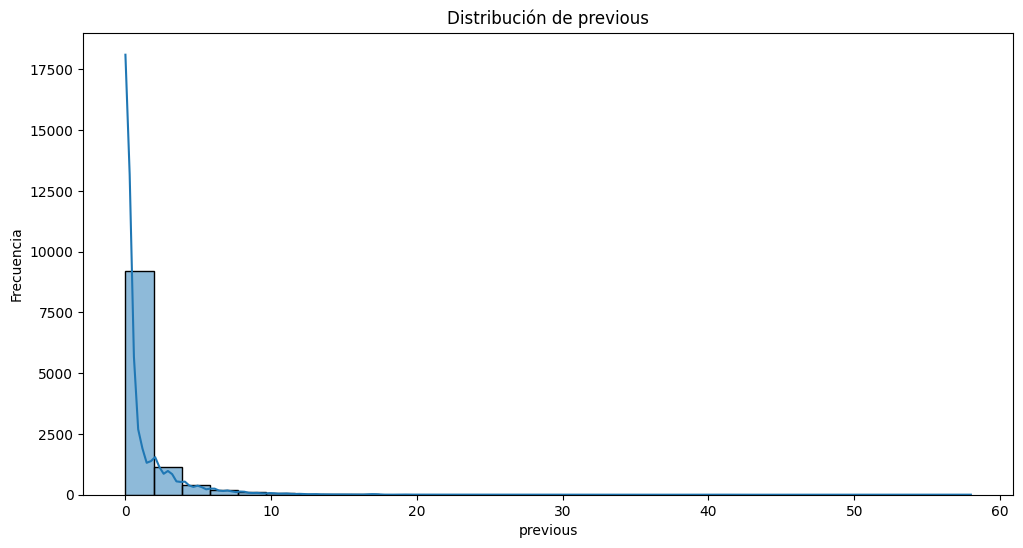

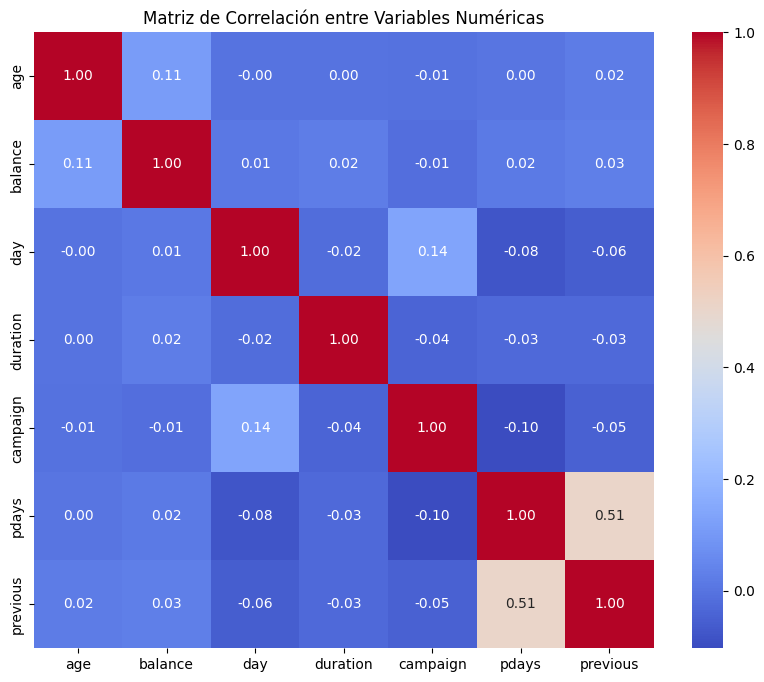

In [14]:
# Paso 1: Detectar valores faltantes
missing_values = df.isnull().sum()
print("Valores faltantes por columna:")
print(missing_values[missing_values > 0])

# Paso 2: Detectar outliers usando el método del rango intercuartílico (IQR)
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data < lower_bound) | (data > upper_bound)]

# Detectar outliers en la columna 'balance' como ejemplo
outliers_balance = detect_outliers_iqr(df['balance'])
print("\nOutliers en la columna 'balance':")
print(outliers_balance)

# Paso 3: Visualización de la distribución de variables numéricas
numeric_columns = df.select_dtypes(include=[np.number]).columns
for col in numeric_columns:
    plt.figure(figsize=(12, 6))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

# Paso 4: Correlaciones entre variables numéricas
plt.figure(figsize=(10, 8))

# Selecciona solo las columnas numéricas
numeric_df = df.select_dtypes(include=[np.number])

# Calcula la matriz de correlación
correlation_matrix = numeric_df.corr()

# Visualiza la matriz de correlación
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.show()

